<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/2.0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< 해당 페이지는 **데이터 전처리** 과정을 담은 페이지입니다. >

> 데이터 변경의 거의 마지막 페이지이며, 분석을 위한 깔끔한 테이블을 만드는 것이 목적입니다.

> 전처리는 크게 일반적, 전문적으로 구분했으며<br>
> 추가적으로 인공지능에 필요한 전처리를 추가 했습니다.

> 기대 결과 값: 분석 혹은 모델에 알맞은 전처리를 시행하고 <br>
> 간략한 특성 간의 관계를 이해하여 특성 조정이나 기대 예측이 가능하다

# 데이터 전처리(Data Preprocessing, Data wrangling)

## 데이터 전처리의 방향성

- 품질적 문제해결 : 결측치, 이상치, 중복데이터 등 데이터 값 처리

- 구조적 문제해결 : 변수의 열과 관측치의 행이 올바른 테이블 만들기<br>
  - 국소적으로는 Tidy data조건을 만족하여 분리가 가능하고
  - 전체적으로는 Untidy data조건을 만족하여 키 값을 기준으로 통합된 형태



---



---



## 일반적인 전처리
> Columns 순서&이름 변경 , 데이터 타입 변경

### Columns 순서&이름 변경

In [ ]:
# Columns 순서 변경
change_col = [ 'ind1', 'ind2' --- ]; df[change_col]

# Columns 이름 변경
df.add_prefix() .add_suffix() # 접두/미사 추가
df.rename( {변경 전 : 변경 후} ,  inplace=True, axis='columns' ) # 이름 단수 변경
df.columns = [ 변경 전 : 변경 후 ] # 이름 복수 변경

### 데이터 타입 변경

In [ ]:
# 데이터 타입 검색
df.select_dtypes(include='data type').head() # include 대신 exclude 사용 시 제외할 타입
df.select_dtypes( 'include = [data type, --- ] ').head() # 다중 데이터 타입 검색

In [ ]:
# 모든 열 같은 데이터 타입으로 일괄 변경
df.columns.astype('data type')

In [ ]:
# 1열을 제외한  모두 같은 데이터 타입으로 변경  >> 해당 1열을 인덱스화 후 해제
df.set_index('제외할 1열')
df.astype('data type')
df.reset_index(inplace = True) # 원본에 영향 - 인덱스 해제 후 새로운 인덱스 생성
# reseut_index 원본 영향 없이 - drop(인덱스 열 삭제 여부) & append(기존 인덱스 삭제 여부) = True/False
# 역순 정렬은  행: df.loc[::-1].reset_index  //  열: df.loc[: , ::-1]

In [ ]:
# 데이터 타입 변경 중 Nan이 있는 경우
df.astype(df.columns, erros = 'coerce' )
# 일괄 수치형 변환
df.apply(pd.to_numeric, erros = 'coerce' )
# 수치 -> 범주형으로 변환(bins는 describe로 4분위 구하기 등 , 레이블은 범위 - labels = ['a', 'b', 'c' --- ])
pd.cut( x=df['레이블로 구분할 칼럼'], bins=bins, labels=labels )

### 정규 표현식

In [ ]:
df['col_name'].str.contains( r[정규표현식] )

( '[ ^ ]' ) # 반전 검색
( '[ "a-zA-Z" or ["ㄱ-ㅎ"] ]' ) # 문자열 검색
( '[ "0-9" ]' or [\d+] ) # 숫자 검색



---



---



## 전문적인 전처리

### 세부(결측치) 데이터 처리 - 품질적 문제 해결
> 결측치 이유 1. 조건부 특성에서의 특정 조건(남성의 임산부 기록)<br>
> 결측치 이유 2. 응답자가 원하지 않아 비운 경우(결측치가 주는 시그널 있음)<br>
> 결측치 이유 3. 엔지니어의 실수

In [ ]:
# 결측치 확인
df.isnull().sum() # null 갯수 출력 : '-' 등 무슨 값이라도 있다면 null로 인식하지 않음
df[ df[col_name].isnull() ] # null 행 출력

# 함수로 특정 오류 값 확인
import re
def has_check(inputstring):
  return bool( re.search('[_ , ! , . , \d+' , inputstring) )
df[ df.col_name.apply(has_check) ]

In [ ]:
# 결측치 변경

# 1. 값 교체
df.col_name.str.replace('a to','b') # b에 np.nan을 넣으면 Nan data 삽입, regex=True면 일부 같더라도 변경
df.col_name.str[:범위].str.pad('범위까지 자릿수', fillchar='자릿수까지 비었다면 채울 내용')

# 2. 값 대체 - df.fillna()로 같지만 파라미터가 다름
(n or 'n') # 단일 값으로 대체
(method = 'ffill' or 'pad' | 'bfill' or 'backfill') # 위/아래값으로 대체(대체 중 nan이면 nan으로 유지됨)
# 위/아래값의 추가 파라미터 - limit=n : 채우는 횟수 제한
# 변형 - df.interpolate(method='nearest').ffill().bfill() : 첫/마지막 결측치를 가까운 위/아래로 대체
( df.mean() ) # 평균 값으로 대체

# 3. 값 제거
df.dropna()
df.col_name.str.strip('content') # 특정 값 제거

# 4. 값 제외(특정 값만 제외)
df[ df.col_name != 'content' ]

# 5. 값 분리(마지막의 str은 split로 분리되는 2개의 데이터셋 모두에게 적용하기 위함)
df['col_name'].str.split('sep_content', len).str

In [ ]:
# Sk-learn 함수 사용 or 키-몸무게 등 다른 특성으로 조건부 채우기 등

# 결측치가 다른 특성과 무관할 경우 사용(충분히 큰 데이터 혹은 결측치가 10% 이내일 때 등 사용)
from sklearn.impute import SimpleImputer # 단일 대표값으로 결측치 채우기
imputer = SimpleImputer(strategy="median") # mean, most_frequent, constant 중 선택 가능
imputer.fit_transform(df)

### 구조(전체)적 데이터 처리 - 구조적 문제 해결

In [ ]:
df['추가할 Col_name'] = array 변수 # 데이터셋에 프레임 추가
df.drop( 'del_col_name', axis=1 )  # 데이터셋의 프레임 제거

In [ ]:
# 데이터셋 분리
df['new_col_name'] = df.sep_col.str.extract( '(\d+)' ) # 정규표현식 분리
pd.melt( df, id_vars=['col_name' , '구분 기준(분리되지 않을)이 될 칼럼'] ) # value_vars = '값 , var_name = '이름'

In [ ]:
# 데이터셋 통합 - how = 'inner(공통)' , 'left(좌측-셋)' , 'right(우측-셋)' , outer(전체)
df.pivot_table(index='index', columns='variable', values='value')
pd.concat( [col1, col2], ignore_index=True ) # 기본 행 정렬, axis=1 or 'columns'면 열 정렬
df.merge(merge_할_col_name, how='' , on = ['key'] )
df1.join(df2) # 추가 파라미터: lsuffix or rsuffix = ''  - 칼럼 이름이 동일 시 변경

### 중복(Duplicated) 처리

In [ ]:
df [ df.duplicated() ] # 중복값 확인
df.duplicated.sum()    # 중복값 갯수 확인

df.drop_duplicated()   # 중복값 제거



---



---



## 인공지능 전처리

In [ ]:
df.describe(exclude='number').sort_values(by='unique') # check the cardinality
# 높은 카디널리티 drop 추가하기

### 수치형 모델 - ex.) Linear / Logisitc Regression etc
> 결측치 반드시 해결(전문적 처리에 추가함)<br>

> 비선형적 특성 혹은 특성 간 상호작용 미리 처리<br>
> 입력 특성의 크기 / 범위 / 분포 통일<br>

> 수치형 선형변환: Min-Max, Standardization, Robust, RankGauss<br>
> 수치형 비선형변환: 로그, 거듭제곱, 정규화<br>
> 수치형 기타변환: KBinsDiscretizer, Rank

#### 입력 특성의 크기 / 범위 / 분포 통일 - 값 분포의 스케일만 변형 도구 2가지

In [ ]:
# 1. Min-Max Scaling - 0~1사이 값으로 스케일링, 이상치가 크게 벗어나지 않음(균등 분포일 때)
from sklearn.preprocessing import MinMaxScaler # Min-Max Scaling - 분포만 스케일링

scaler = MinMaxScaler()
scaler.fit_transform(df).values.reshape(-1 , 1)


# 2. Standardization - 평균을 0, 표준편차를 1로 조정함, 수치형 변환 첫 시도(이상치 분포 확인이 어려울 때)
from sklearn.preprocessing import StandardScaler # Standardization - 0평균/1표준편차 분포만 스케일링

scaler = StandardScaler()
scaler.fit_transform(df).values.reshape(-1 , 1)

# 그래프의 경우 1과 2과 동일하게 나옴, 원본이나 스케일 이후나 형태는 똑같다
# 하지만 마지막 스케일의 경우 균등하게 증가하며, 이상치가 1로 적절하지 않은 적용임을 알 수 있다

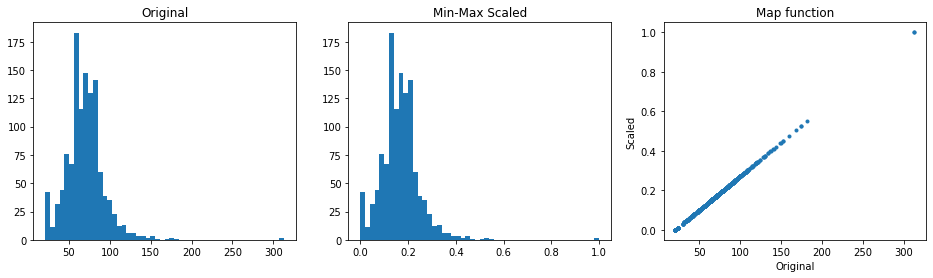

#### 입력 특성의 크기 / 범위 / 분포 통일 - 값 분포의 스케일과 형태(값 간의 상대적 거리 변화) 변형 도구 4가지

In [ ]:
# 1. Clipping - 특정 범위 이상의 값은 경계값으로 변환, 분포 전체보다는 이상치에만 영향을 줌
df[col_name].clip(lower=n, upper=n)

# 원본에서 300이 초과하던 값이 150으로 압축되었다, 원본의 변경은 없지만
# 마지막 스케일의 경우 지정값까지는 균일하지만 이후에는 경계값으로 고정된 1차원 형태

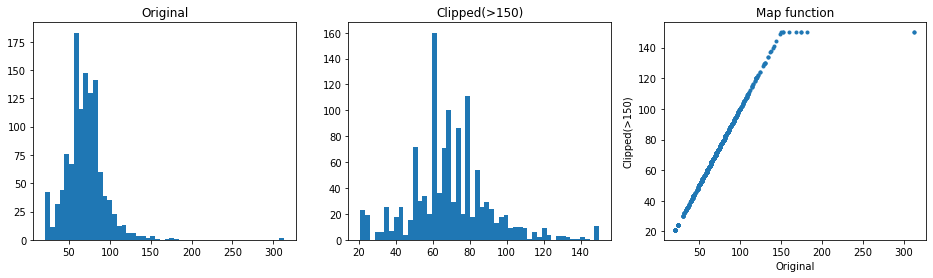

In [ ]:
# 2. 로그 변환 - 다수 값이 제한된 범위, 특정 값들이 굉장히 큰 형태에서 사용, 음이 아닐 때만 사용 가능
np.log1p( df[col.name] )

# 원본 그래프에서 정규분포의 형태로 변환되었다, 그 결과 마지막 스케일도 완만한 곡선의 형태가 되었다.
# 좁은 범위로 스케일되었고, 계단형태로 값이 증가되었지만 값이 많기에 곡선형태로 보임

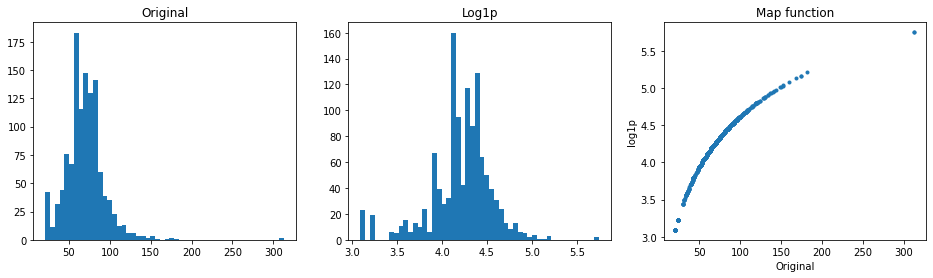

In [ ]:
# 3. Bucketing - 수치형을 범주형처럼 이용, 값이 속하는 범위를 지정하고 속하는지를 숫자로 나타냄
# 값의 범위(strategy) - 1) quantile: 범위 내에 동일한 수 , 2) uniform: 동일 간격으로 분리 , 3) kmeans
from sklearn.preprocessing import KBinsDiscretizer # Bucketing - 수치형 값을 범위에 속하는지 구분
kdb = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') # encode는 onehot도 가능함
kdb.fit_transform(df).values.reshape(-1, 1)

# 원본 그래프가 범위 범주에 속하는지로 변경됨, 스케일 그래프도 불완전 그래프를 보임

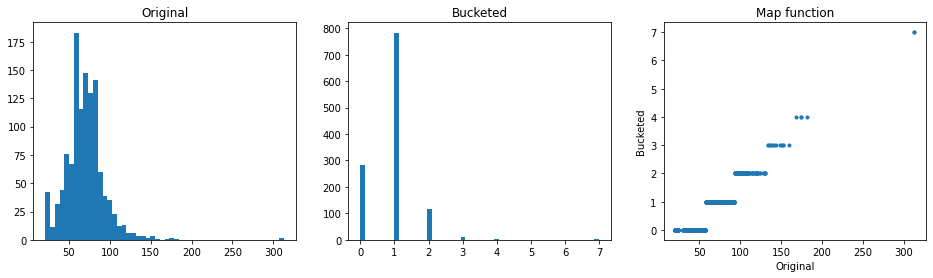

In [ ]:
# 4. Rank변환 - 균등분포로 변경(값을 전체 데이터에서 순위로 변환, 대소관계만 남음), 기존에 없는 데이터는 변환불가
df[col_name].rank(pct=True) # True면 %로 False면 rank 자체를 반환

from sklearn.preprocessing import QuantileTransformer
tfer = QuantileTransformer()
tfer.fit_transform( df[col_name].values.reshape(-1,1) )

# 원본 그래프에서 값의 순서를 받아 (정렬이 안되었기에) 불규칙한 그래프처럼 보이지만
# 스케일링 그래프를 보면 값이 곡선으로 천천히 증가하는 것을 알 수 있다.

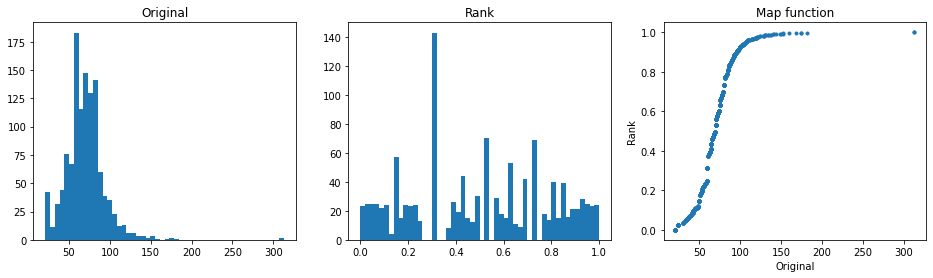



---



---



### 범주형 모델 - ex.) Tree Based Model etc
> 입력 특성의 대소관계에만 영향을 받음<br>
> 수치형으로 바꾸는 전처리 필요(Encoding)

In [ ]:
from category_encoders import OneHotEncoder # 명목형 변수 변환, 값이 포함여부(0/1)로 특성 증가
onehot_encoder = OneHotEncoder()
onehot_encoder.fit_transform(df)

In [ ]:
from category_encoders import OrdinalEncoder # 순서형 변수 변환, 범주형 특성 값을 양적 대소 관계로 인코딩
# 선형-로지스틱 회귀 모델에는 양적 대소관계를 갖는 것처럼 되기에 부적절함, 트리모델은 분기로 관계가 해소됨
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(df)

In [ ]:
# Count(Frequency) - 등장빈도로 값 대체(단, 동일 빈도의 특성값 구분이 안됨, 새로운 특성값 대처가 어려움)
from category_encoders import CountEncoder
count_encoder = CountEncoder(normalize=True) # True면 %, False면 빈도를 반환
count_encoder.fit_transform(df)

In [ ]:
# Target(Mean) - 범주형 값의 해당 특성을 가진 타겟 데이터의 평균으로 인코딩(같은 값 구분 안됨)
df.groupby('features')['target'].mean() # 과적합 발생 가능

from category_encoders import TargetEncoder # 특성별 조건부 타겟 평균값 + 출현 빈도
target_encoder = TargetEncoder()
target_encoder.fit_transform(df["features"], y=df["target"])